# Perkenalan



Nama: Made Ary Widanthi <br>
Batch: FTDS 020 RMT<br>
Dataset: Uber and Lyft Dataset Boston, MA <br>
Source: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma <br>
Objective: Membuat model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.




# Import Libraries

In [1]:
! pip install category_encoders

In [2]:
! pip install feature_engine

In [3]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.linear_model import LinearRegression
import math
import pickle
import json
import pandas as pd
import numpy as np


# Data Loading

In [4]:
# Load Dataset
data = pd.read_csv('rideshare_kaggle.csv')

In [5]:
# Check Dataset -1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari data ini terdiri dari 57 kolom yang dimana terdapat numerical data: 29 kolom dengan data type float64, 17 kolom dengan data type int64 dan categorikal data: 11 kolom kategorikal

In [7]:
# Check Dataset -2
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Statement:

# Exploratory Data Analysis

In [8]:
#buat list data bertipe object dan number
obj_cols= list(data.select_dtypes('object'))
num_cols= list(data.select_dtypes('number'))
print(obj_cols)
print(num_cols)

['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']
['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [21]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Menganalisa korelasi antara numerikal data dengan price

In [9]:
# Mencari korelasi antara kolom price dengan numerikal data
data.corr().style.background_gradient().set_precision(2)

C:\Users\arywi\AppData\Local\Temp\ipykernel_10584\2912293173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient().set_precision(2)
C:\Users\arywi\AppData\Local\Temp\ipykernel_10584\2912293173.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient().set_precision(2)


,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.00,-0.03,-0.34,0.77,0.00,0.00,0.00,0.17,-0.14,-0.25,-0.23,-0.18,-0.15,-0.17,-0.07,0.01,1.00,0.16,-0.23,1.00,-0.37,1.00,-0.22,1.00,-0.40,1.00,-0.27,0.53,-0.13,-0.08,-0.03,0.16,0.20,1.00,1.00,-0.85,-0.21,1.00,-0.31,1.00,-0.19,1.00,-0.38,1.00,-0.16,1.00
hour,-0.03,1.00,0.07,-0.08,0.00,0.00,-0.00,0.02,-0.01,0.22,0.20,-0.23,-0.13,-0.28,0.07,0.08,-0.03,0.17,0.01,-0.03,0.02,-0.03,0.01,-0.03,0.02,-0.03,0.00,-0.07,0.04,0.03,0.33,0.17,0.03,-0.03,-0.03,0.02,0.02,-0.03,0.02,-0.03,0.00,-0.03,0.02,-0.03,0.00,-0.03
day,-0.34,0.07,1.00,-0.86,-0.00,-0.00,0.00,0.01,0.08,-0.08,-0.22,0.09,0.03,-0.09,0.44,0.40,-0.34,0.10,-0.28,-0.34,-0.09,-0.33,-0.40,-0.34,-0.19,-0.34,-0.10,-0.44,0.09,-0.04,-0.01,0.10,0.38,-0.34,-0.34,-0.01,0.15,-0.34,0.04,-0.33,-0.30,-0.34,-0.02,-0.34,-0.44,-0.34
month,0.77,-0.08,-0.86,1.00,0.00,0.00,-0.00,0.09,-0.13,-0.08,0.02,-0.15,-0.10,-0.02,-0.33,-0.27,0.77,0.01,0.07,0.77,-0.14,0.77,0.15,0.77,-0.09,0.77,-0.07,0.59,-0.14,-0.02,-0.01,0.01,-0.15,0.77,0.77,-0.45,-0.21,0.77,-0.19,0.77,0.11,0.77,-0.19,0.77,0.22,0.77
price,0.00,0.00,-0.00,0.00,1.00,0.35,0.24,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
distance,0.00,0.00,-0.00,0.00,0.35,1.00,0.02,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
surge_multiplier,0.00,-0.00,0.00,-0.00,0.24,0.02,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
latitude,0.17,0.02,0.01,0.09,0.00,0.00,0.00,1.00,-0.53,-0.10,-0.07,-0.07,-0.07,-0.12,-0.10,0.02,0.17,0.12,-0.12,0.17,-0.03,0.17,-0.09,0.17,-0.00,0.17,-0.13,0.15,-0.03,-0.06,0.01,0.12,0.06,0.17,0.17,-0.20,-0.05,0.17,-0.11,0.17,-0.11,0.18,-0.10,0.17,-0.08,0.17
longitude,-0.14,-0.01,0.08,-0.13,-0.00,-0.00,-0.00,-0.53,1.00,0.01,-0.01,0.13,0.12,0.09,0.09,-0.01,-0.14,-0.10,0.01,-0.14,0.08,-0.14,-0.00,-0.14,0.02,-0.14,0.06,-0.09,-0.03,0.07,0.01,-0.10,-0.02,-0.14,-0.14,0.10,0.03,-0.14,0.05,-0.14,-0.01,-0.14,0.01,-0.14,-0.02,-0.14
temperature,-0.25,0.22,-0.08,-0.08,-0.00,-0.00,-0.00,-0.10,0.01,1.00,0.95,0.18,0.24,0.31,0.06,-0.01,-0.25,-0.32,0.79,-0.26,0.50,-0.25,0.71,-0.26,0.38,-0.25,0.86,-0.34,-0.24,0.36,0.16,-0.32,-0.29,-0.25,-0.25,0.35,0.33,-0.25,0.79,-0.24,0.78,-0.25,0.82,-0.23,0.70,-0.26


menggunakan fungsi corr() pada pandas untuk mengetahui korelasi antar features yang tersedia. Karena ingin memprediksi price, saya akan fokus pada kolom price dan menemukan nilai tertinggi yang mendekati angka 1 (yang artinya berkorekasi sempurna) pada kolom distance sebanyak 0.35 dan surge_multiplier 0.25.

<Axes: xlabel='distance', ylabel='Density'>

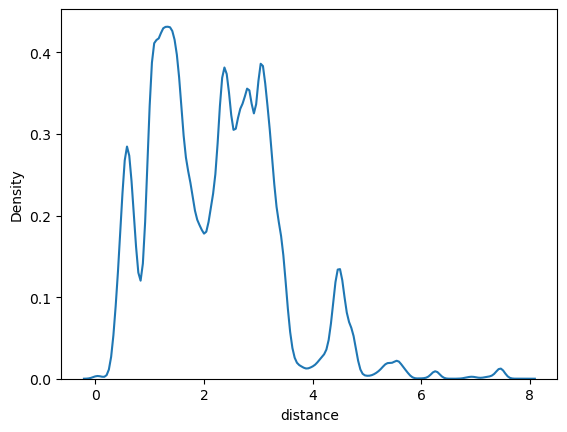

In [10]:
sns.kdeplot(data['distance'])

<Axes: >

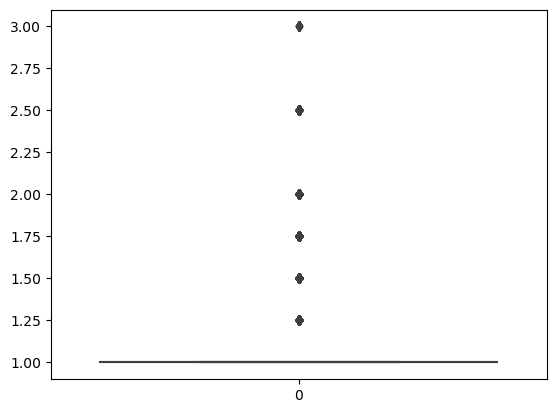

In [16]:
sns.boxplot(data['surge_multiplier'])

## Menganalisa korelasi antara kategorikal data dengan price

In [34]:
# Menganalisa korelasi antara kategorikal data dengan price

categorical_data = data[['source', 'destination', 'cab_type', 'name', 'icon']]

In [35]:
#Mencari unique value dari masing-masing kategorikal data menggunakan looping

for column in categorical_data:
  print(column, ":", categorical_data[column].unique(), "\n")

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University'] 

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University'] 

cab_type : ['Lyft' 'Uber'] 

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi'] 

icon : [' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day '] 



In [37]:
from sklearn.preprocessing import OneHotEncoder
# Encode kategorikal data
OH_Encoder = OneHotEncoder()

In [47]:
categorical_data_encoded = OH_Encoder.fit_transform(data[['source', 'destination', 'cab_type', 'name', 'icon']])

# Convert the encoded sparse matrix to an array
reshaped_array = categorical_data_encoded.toarray()

In [51]:
reshaped_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [48]:
categorical_data_encoded

<693071x46 sparse matrix of type '<class 'numpy.float64'>'
	with 3465355 stored elements in Compressed Sparse Row format>

In [57]:
# Membandingkan dengan kolom price
categorical_data_encoded['price']= data['price']
categorical_data_encoded.corr().style.background_gradient().set_precision(2)

IndexError: Index dimension must be 1 or 2

Berdasarkan data korelasi diatas, kolom name memiliki negative korelasi tinggi: -0.58 yang artinya hubungan korelasi antara price dan name jika salah satu nilai variable meningkat maka variable satunya akan menurun dan sebaliknya.

## Lanjut

In [18]:
# Membuat dataframe baru dengan features yang memiliki korelasi tinggi

data1 = data[['price', 'distance', 'surge_multiplier']]
data1

,price,distance,surge_multiplier
0,5.0,0.44,1.0
1,11.0,0.44,1.0
2,7.0,0.44,1.0
3,26.0,0.44,1.0
4,9.0,0.44,1.0
...,...,...,...
693066,13.0,1.00,1.0
693067,9.5,1.00,1.0
693068,NaN,1.00,1.0
693069,27.0,1.00,1.0


# Feature Engineering

## Split antara X(Features) and y (Target)

In [19]:
#Splitting between X and y
X = data1.drop(['price'], axis=1)
y = data1['price']
X

,distance,surge_multiplier
0,0.44,1.0
1,0.44,1.0
2,0.44,1.0
3,0.44,1.0
4,0.44,1.0
...,...,...
693066,1.00,1.0
693067,1.00,1.0
693068,1.00,1.0
693069,1.00,1.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9)

print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)
X_train

Train Size: (554456, 3)
Test Size: (138615, 3)


,distance,surge_multiplier,name
448822,4.59,1.0,Lyft
621580,2.58,1.0,UberX
309262,2.41,1.0,Lux Black XL
250941,1.96,1.0,Taxi
101601,3.01,1.0,UberX
...,...,...,...
91261,2.26,1.0,Lux Black
267158,0.39,1.0,Black
173819,4.73,1.0,WAV
459253,2.84,1.0,Lyft


## Handle Outlier

### Cek Distribusi Data

In [23]:
# Function to create histogram and boxplot.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


Price Skewness Value :  1.0457470560899256

Distance Skewness Value :  0.8343950077972692

Surge Multiplier Skewness Value :  8.32024804653164

Name Skewness Value :  -0.029558983437179852


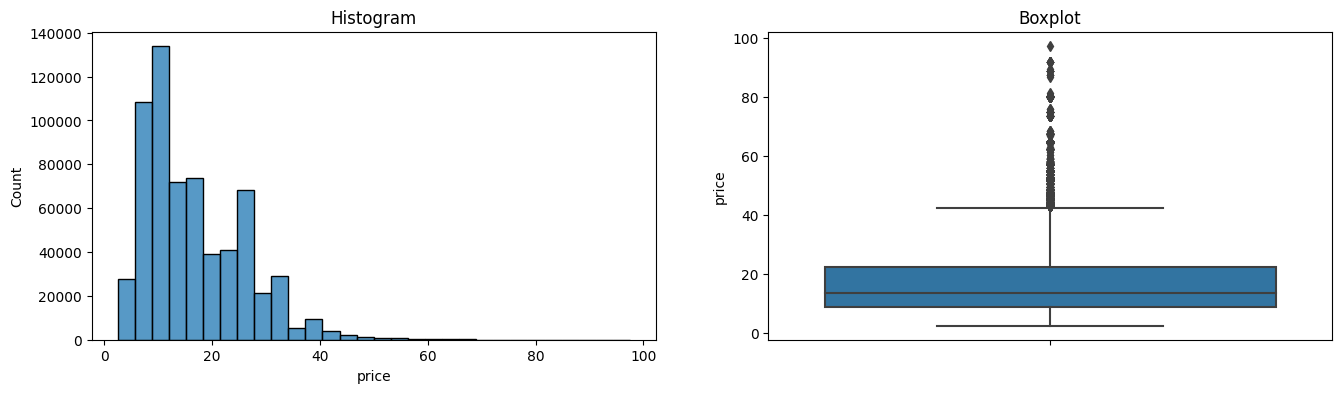

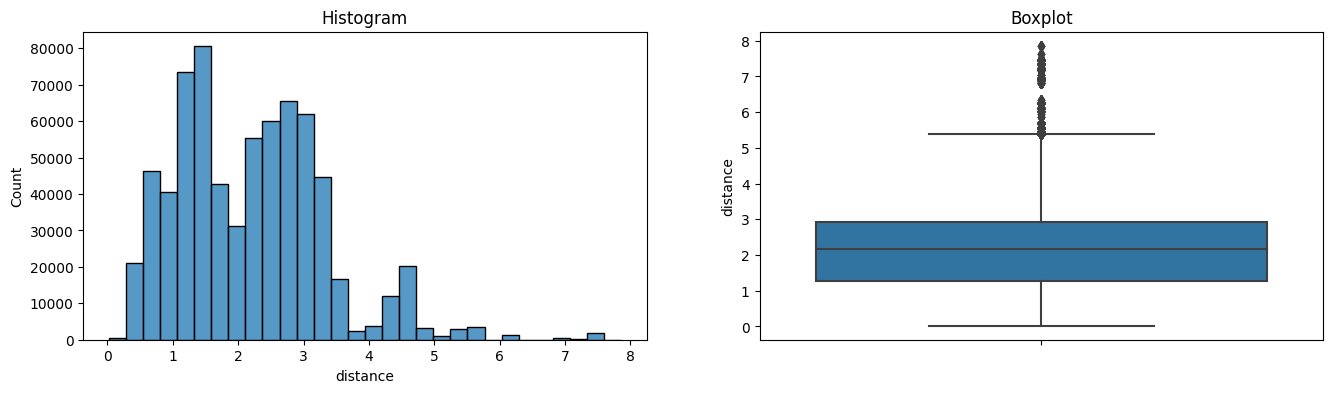

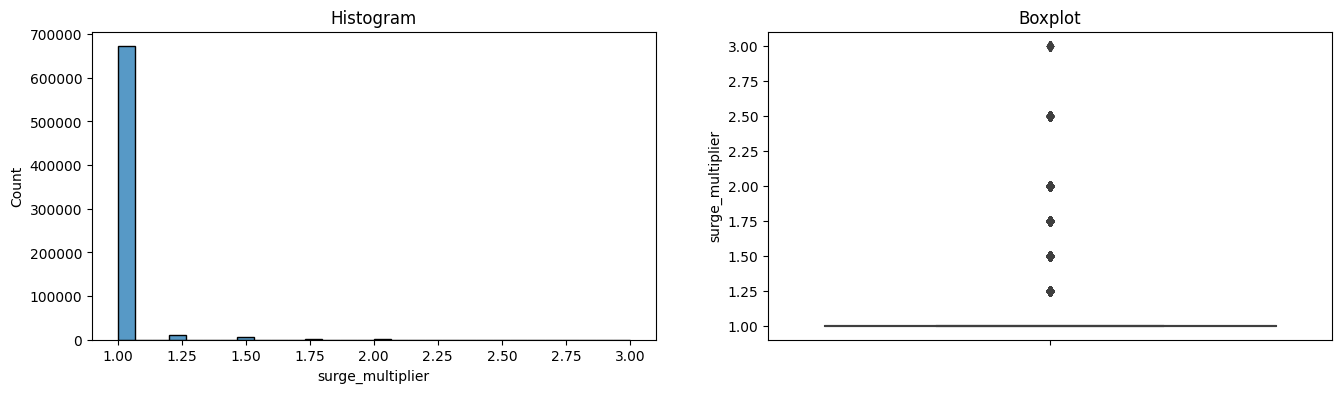

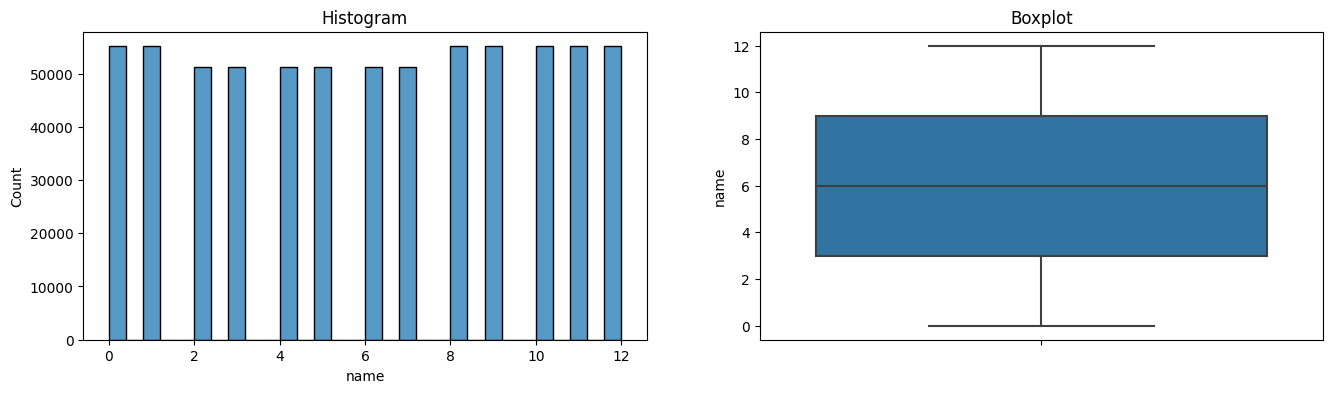

In [24]:
# Mengecek distribusi data pada features 'price', 'distance', 'surge_multiplier', 'name'

print('\nPrice Skewness Value : ', data1['price'].skew())
print('\nDistance Skewness Value : ', data1['distance'].skew())
print('\nSurge Multiplier Skewness Value : ', data1['surge_multiplier'].skew())
print('\nName Skewness Value : ', categorical_data['name'].skew())

diagnostic_plots(data1, 'price')
diagnostic_plots(data1, 'distance')
diagnostic_plots(data1, 'surge_multiplier')
diagnostic_plots(categorical_data, 'name')

Data yang memiliki korelasi tinggi terhadap kolom price terdistribusi secara tidak normal.<br>
Data price cenderung terdistribusi ke arah kanan atau right skew<br>
Data

In [25]:
# Membuat fungsi untuk mencari batas atas dan batas bawah kolom distance
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [26]:
# Mencari batas atas dan batas bawah dari kolom distance
upper_boundary, lower_boundary = find_skewed_boundaries(data1, 'distance', 1.5)
upper_boundary, lower_boundary

(5.38, -1.18)

In [27]:
# Cek data outlier pada kolom distance

print('Total data distance : {}'.format(len(data1)))
print('Total data distance dengan nilai lebih dari 5.38  : {}'.format(len(data1[data1['distance'] > upper_boundary])))
print('')
print('% Total data distance dengan nilai lebih dari 5.38 : {}'.format(len(data1[data1['distance'] > upper_boundary])/len(data1) * 100))

Total data distance : 693071
Total data distance dengan nilai lebih dari 5.38  : 8662

% Total data distance dengan nilai lebih dari 5.38 : 1.2497998040604787


Dari total data 693071 pada kolom distance, terdapat 8662 outliers data dengan batas atas 5.38 atau dalam persentase 1,2% (hanya menggunakan batas atas karena batas bawah merupakan nilai negative yang dimana kolom distance tidak terdapat nilai negative)

In [28]:
# Mencari batas atas dan batas bawah dari kolom surge_multiplier
upper_boundary, lower_boundary = find_skewed_boundaries(data1, 'surge_multiplier', 1.5)
upper_boundary, lower_boundary

(1.0, 1.0)

In [29]:
data1['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [30]:
# Cek data outlier pada kolom surge_multiplier

print('Total data surge_multiplier : {}'.format(len(data1)))
print('Total data distance dengan nilai lebih dari 1  : {}'.format(len(data1[data1['surge_multiplier'] > upper_boundary])))
print('')
print('% Total data distance dengan nilai lebih dari 1 : {}'.format(len(data1[data1['surge_multiplier'] > upper_boundary])/len(data1) * 100))

Total data surge_multiplier : 693071
Total data distance dengan nilai lebih dari 1  : 20975

% Total data distance dengan nilai lebih dari 1 : 3.026385464115509


Dari data surge_multiplier, batas atas dan bawahnya adalah 1 yang artinya data selain 1 merupakan outlier. Terdapat 20975 data outlier (3%)

<Axes: >

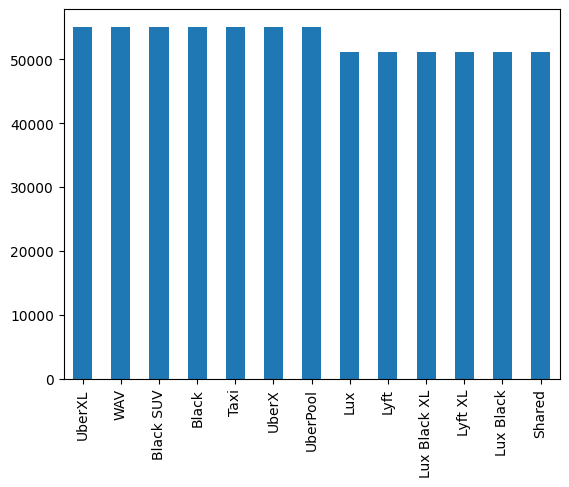

In [31]:
data['name'].value_counts().plot(kind="bar")

### Cencoring

In [32]:
# Get Numeric Columns and Cetogory Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num columns', num_columns)
print('Cat columns', cat_columns)

Num columns ['distance', 'surge_multiplier']
Cat columns ['name']


In [33]:
#buat list data bertipe object dan number
obj_cols= list(X_train.select_dtypes('object'))
num_cols= list(X_train.select_dtypes('number'))
print(obj_cols)
print(num_cols)

['name']
['distance', 'surge_multiplier']


In [34]:
# Split Trains-Set and Test-Set based on Column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,distance,surge_multiplier
448822,4.59,1.0
621580,2.58,1.0
309262,2.41,1.0
250941,1.96,1.0
101601,3.01,1.0
...,...,...
91261,2.26,1.0
267158,0.39,1.0
173819,4.73,1.0
459253,2.84,1.0


In [35]:
# Menggunakan windsorizer

windsoriser = Winsorizer(capping_method='gaussian', # Mneggunakan gaussian karena gives the value to multiply the std, karena value surge_multiplier memiliki batas atas dan bawah 1
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['distance', 'surge_multiplier'])

windsoriser.fit(X_train_num)

data_outlier = windsoriser.transform(X_train_num)

In [36]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'distance': 0.48042073140439845, 'surge_multiplier': 0.8764440482064362}
Right Tail Caps :  {'distance': 3.8977493307826827, 'surge_multiplier': 1.1512389419677167}


In [37]:
print("sebelum capping:", X_train_num.describe(),"\n")
print("setelah capping:", data_outlier.describe())

sebelum capping:             distance  surge_multiplier
count  554456.000000     554456.000000
mean        2.189085          1.013841
std         1.139111          0.091598
min         0.020000          1.000000
25%         1.270000          1.000000
50%         2.160000          1.000000
75%         2.930000          1.000000
max         7.860000          3.000000 

setelah capping:             distance  surge_multiplier
count  554456.000000     554456.000000
mean        2.124222          1.004565
std         0.980648          0.025875
min         0.480421          1.000000
25%         1.270000          1.000000
50%         2.160000          1.000000
75%         2.930000          1.000000
max         3.897749          1.151239


Dapat dilihat perubahan pada min dan max menjadi lebih sedikit

In [38]:
X_train_num = windsoriser.transform(X_train_num)

## Handle Missing Value

In [39]:
data[data.price.isnull()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
693047,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693049,885ef635-299e-45cf-8052-c45a39e9822a,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693060,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000


In [40]:
check = data1[data.price.isnull()]
check['name'].unique()

array(['Taxi'], dtype=object)

In [41]:
y_train.isnull().sum()

44075

Semua missing data(6.36%) merupakan cab_type Uber dengan nama Taxi. Karena kolom price adalah feature yang akan di prediksi, maka missing value merupakan tipe Missing at Random (Ada hubungan sistematis antara kecenderungan nilai yang hilang dan data yang diamati.)

In [42]:
# Replace with your chosen arbitrary value
arbitrary_value = 0

# mengubah missing value di train set
y_train.fillna(arbitrary_value, inplace=True)

# mengubah missing value di test set
y_test.fillna(arbitrary_value, inplace=True)

## Feature Scaling

In [43]:
# Display X_train

X_train_num

,distance,surge_multiplier
448822,3.897749,1.0
621580,2.580000,1.0
309262,2.410000,1.0
250941,1.960000,1.0
101601,3.010000,1.0
...,...,...
91261,2.260000,1.0
267158,0.480421,1.0
173819,3.897749,1.0
459253,2.840000,1.0


In [44]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num) #harus x_train

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[1.        , 0.        ],
       [0.61439198, 0.        ],
       [0.56464552, 0.        ],
       ...,
       [1.        , 0.        ],
       [0.6904748 , 0.        ],
       [1.        , 0.        ]])

## Feature Encoding

In [45]:
data['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [46]:
label_encoder = LabelEncoder()

X_train_cat['name_encoded'] = label_encoder.fit_transform(X_train_cat['name'])
X_test_cat['name_encoded'] = label_encoder.transform(X_test_cat['name'])

X_train_cat.drop('name', axis=1, inplace=True)
X_test_cat.drop('name', axis=1, inplace=True)

print(X_train_cat)
print(X_test_cat)


        name_encoded
448822             5
621580            10
309262             4
250941             8
101601            10
...              ...
91261              3
267158             0
173819            12
459253             5
516478             9

[554456 rows x 1 columns]
        name_encoded
293230             1
208475            12
31400              2
277098            12
173305             5
...              ...
588911            12
452975            10
314563             6
651083            10
506144             7

[138615 rows x 1 columns]


<ipython-input-46-9c3f95714858>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['name_encoded'] = label_encoder.fit_transform(X_train_cat['name'])
<ipython-input-46-9c3f95714858>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat['name_encoded'] = label_encoder.transform(X_test_cat['name'])
<ipython-input-46-9c3f95714858>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [47]:
X_train_cat['car_name'] = X_train_cat['name_encoded'].map({0:0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0})
X_test_cat['car_name'] = X_test_cat['name_encoded'].map({0:0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0})


<ipython-input-47-bcbe20c562d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['car_name'] = X_train_cat['name_encoded'].map({0:0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0})
<ipython-input-47-bcbe20c562d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat['car_name'] = X_test_cat['name_encoded'].map({0:0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0})


In [48]:
X_train_cat_encoded = X_train_cat['car_name']
X_test_cat_encoded = X_test_cat['car_name']

In [49]:
X_train_cat_encoded = np.array(X_train_cat_encoded)
X_train_cat_encoded = X_train_cat_encoded.reshape(-1, 1)

In [50]:
X_test_cat_encoded = np.array(X_test_cat_encoded)
X_test_cat_encoded = X_test_cat_encoded.reshape(-1, 1)

## Concate

In [51]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[1.        , 0.        , 0.        ],
       [0.61439198, 0.        , 1.        ],
       [0.56464552, 0.        , 1.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [0.6904748 , 0.        , 0.        ],
       [1.        , 0.        , 1.        ]])

In [52]:
# Create DataFrame of X_train_final

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,distance,surge_multiplier,name
0,1.000000,0.0,0.0
1,0.614392,0.0,1.0
2,0.564646,0.0,1.0
3,0.432964,0.0,0.0
4,0.740221,0.0,1.0
...,...,...,...
554451,0.520752,0.0,1.0
554452,0.000000,0.0,0.0
554453,1.000000,0.0,0.0
554454,0.690475,0.0,0.0


# Model Definition

In [53]:
# Training using Linear Regression

model_lin_reg = LinearRegression()

# Model Training

In [54]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# Model Evaluation

In [55]:
# Predict Train-Set and Test_Set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([18.76026492, 18.35557921, 17.85722412, ..., 18.76026492,
       15.65947217, 22.21856211])

In [56]:
MSE = np.square(np.subtract(y_train,y_pred_train)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

9.172841049251792


# Model Saving

In [75]:
# Save the files

import pickle
import json

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('label_encoder.pkl', 'wb') as file_4:
  pickle.dump(label_encoder, file_4)

with open('model_lin_reg.pkl','wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

# Model Inference

In [58]:
# Get Intercept and Slope

print('Intercept:', model_lin_reg.intercept_)
print('Slope:', model_lin_reg.coef_)

Intercept: 8.742364221826318
Slope: [10.0179007  11.71012575  3.45829719]


In [59]:
# Create New Data

data_inf = {
    "hour": 15,
    "day": 15,
    "month": 11,
    "source": 'Back Bay',
    "destination": 'Northeastern University',
    "name" : 'Shared',
    "distance": 1.08,
    "temperature": 39.15,
    "apparentTemperature": 40,
    "short_summary": ' Rain ',
    "precipIntensity": 0.1509,
    "precipProbability": 1,
    "humidity": 0.95,
    "windSpeed": 10,
    "windGust": 10,
    "windGustTime": 1543334400,
    "visibility": 10,
    "temperatureHigh": 50,
    "temperatureHighTime": 1543510800,
    "temperatureLow": 28.9,
    "temperatureLowTime": 1543579200,
    "apparentTemperatureHigh": 38.53,
    "apparentTemperatureHighTime": 1543510800,
    "apparentTemperatureLow": 26.2,
    "apparentTemperatureLowTime": 1543575600,
    "dewPoint": 26.44,
    "pressure": 1013.73,
    "windBearing": 310,
    "cloudCover": 0,
    "uvIndex": 0,
    "visibility.1": 10,
    "ozone": 315.7,
    "sunriseTime": 1543319437,
    "sunsetTime": 1543353364,
    "moonPhase": 0.68,
    "precipIntensityMax": 0.1064,
    "uvIndexTime": 1543338000,
    "temperatureMin": 35.36,
    "temperatureMinTime": 1543377600,
    "temperatureMax": 47.55,
    "temperatureMaxTime": 1543320000,
    "apparentTemperatureMin": 31.04,
    "apparentTemperatureMinTime": 1543377600,
    "apparentTemperatureMax": 44.12,
    "apparentTemperatureMaxTime": 1543320000
}

data_inf = pd.DataFrame([data_inf])
data_inf

,hour,day,month,source,destination,name,distance,temperature,apparentTemperature,short_summary,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,15,15,11,Back Bay,Northeastern University,Shared,1.08,39.15,40,Rain,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [72]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = list(data_inf.select_dtypes('object'))
data_inf_cat = num_cols= list(data_inf.select_dtypes('number'))

In [76]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = label_encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: ignored

In [69]:
# Predict using Linear Regression

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

NameError: ignored

# Kesimpulan

1. based on EDA:
Berdasarkan Ekslporasi data, dapat disimpulkan bahwa feature yang berpengaruh pada jumlah price adalah distance, surge multiplier dan name pada kategorikal data

2. based on Model Evaluation
Berdasarkan model yang telah dibuat, menggunakan metode RMSE untuk mengukur akurasi dari model karena ingin memperoleh error sekecil mungkin.

3. based on Model Analysis <br>
Kelemahan dari model ini adalah merupakan model underfit yang dimana tingkat error nya masih tinggi.